In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

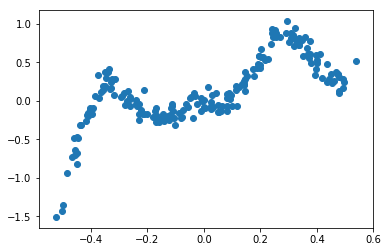

In [3]:
plt.scatter(x, y)

In [4]:
xx = np.linspace(min(x), max(x), num=200)

In [5]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)
# xx_data = xx.reshape(-1,1)

In [6]:
import mylibrary.nnlib as tnn

optimizer = tnn.Adam()
linear1 = tnn.LinearLayer(1, 1, optimizer=optimizer)

_______________________
epoch 0
Loss 0.044884304414714506
Weight 1 
 [[1.03698056]]
Biases 1 
 [0.12855245]


_______________________
epoch 10
Loss 0.0448843044147145
Weight 1 
 [[1.03698056]]
Biases 1 
 [0.12855245]


_______________________
epoch 20
Loss 0.0448843044147145
Weight 1 
 [[1.03698056]]
Biases 1 
 [0.12855245]


_______________________
epoch 30
Loss 0.0448843044147145
Weight 1 
 [[1.03698056]]
Biases 1 
 [0.12855245]


_______________________
epoch 40
Loss 0.0448843044147145
Weight 1 
 [[1.03698056]]
Biases 1 
 [0.12855245]


_______________________
epoch 50
Loss 0.044884304414714506
Weight 1 
 [[1.03698056]]
Biases 1 
 [0.12855245]


_______________________
epoch 60
Loss 0.044884304414714506
Weight 1 
 [[1.03698056]]
Biases 1 
 [0.12855245]


_______________________
epoch 70
Loss 0.0448843044147145
Weight 1 
 [[1.03698056]]
Biases 1 
 [0.12855245]


_______________________
epoch 80
Loss 0.044884304414714506
Weight 1 
 [[1.03698056]]
Biases 1 
 [0.12855245]


____________

TclError: this isn't a Tk application

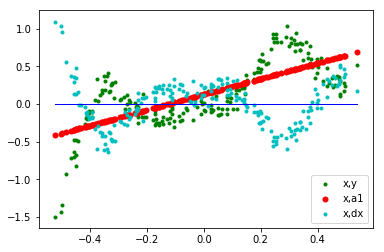

In [12]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = linear1.forward(x_data)
    loss = tnn.MseLoss.loss(a1, y_data)
    dy = tnn.MseLoss.del_loss(a1, y_data)
    
    dx = linear1.backward(dy)
    
    linear1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dy.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
        plt.plot(x, np.zeros_like(x), c='b', lw=1)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        print("Weight 1", '\n', linear1.weights)
        print("Biases 1", '\n', linear1.bias)
        
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

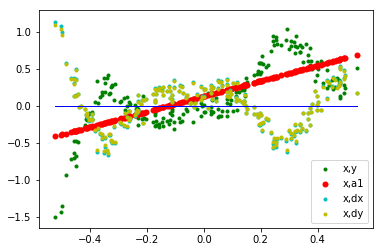

In [13]:
%matplotlib inline

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.scatter(x, dy.reshape(-1), marker='.', c='y', lw=1, label='x,dy')
plt.legend()

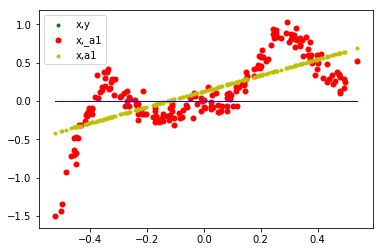

In [29]:
_a1 = a1 - dy

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, _a1.reshape(-1), marker='.', c='r', lw=3, label='x,_a1')
plt.scatter(x, a1.reshape(-1), marker='.', c='y', lw=1, label='x,a1')
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.legend()

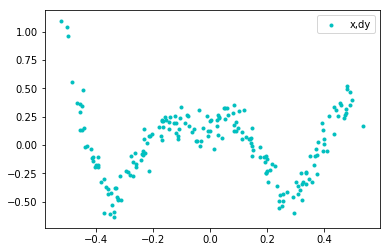

In [30]:
plt.scatter(x, dy.reshape(-1), marker='.', c='c', lw=1, label='x,dy')
plt.legend()

In [31]:
'''
Error reduction by predicting dy from y
'''

'\nError reduction by predicting dy from y\n'

In [40]:
hidden_size = 3

layer1a = tnn.NonLinearLayer(1, hidden_size, activation=tnn.Relu(), optimizer=optimizer)
layer2a = tnn.LinearLayer(hidden_size, 1, optimizer=optimizer)

In [41]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    
    a1a = layer1a.forward(a1)
    a2a = layer2a.forward(a1a)
    
#     a1l = linear1.forward(x_data - a2a)
    
    lossa = tnn.MseLoss.loss(a2a, dy)
    dya = tnn.MseLoss.del_loss(a2a, dy)
    
    da1 = layer2a.backward(dya)
    dxa = layer1a.backward(da1)
    
    layer1a.update()
    layer2a.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        
        plt.scatter(x, dy.reshape(-1), marker='.', c='g', lw=1, label='x, dy')
        plt.scatter(x, a2a.reshape(-1), marker='.', c='r', lw=3, label='x,a2a')
        plt.scatter(x, dya.reshape(-1), marker='.', c='c', lw=1, label='x,dya')
        plt.plot(x, np.zeros_like(x), c='b', lw=1)
        plt.legend()
        
        colors = ['plum', 'darkviolet', 'purple', 'indigo']
        for i, out in enumerate(a1a.T):
            plt.scatter(x, out, marker='.', c=colors[i], lw=1)
        
        fig.canvas.draw()
        
        plt.pause(0.01)
#         print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.044884304414714506
_______________________
epoch 10
Loss 0.044884304414714506
_______________________
epoch 20
Loss 0.044884304414714506
_______________________
epoch 30
Loss 0.044884304414714506
_______________________
epoch 40
Loss 0.044884304414714506
_______________________
epoch 50
Loss 0.044884304414714506
_______________________
epoch 60
Loss 0.044884304414714506
_______________________
epoch 70
Loss 0.044884304414714506
_______________________
epoch 80
Loss 0.044884304414714506
_______________________
epoch 90
Loss 0.044884304414714506
_______________________
epoch 100
Loss 0.044884304414714506
_______________________
epoch 110
Loss 0.044884304414714506
_______________________
epoch 120
Loss 0.044884304414714506
_______________________
epoch 130
Loss 0.044884304414714506
_______________________
epoch 140
Loss 0.044884304414714506
_______________________
epoch 150
Loss 0.044884304414714506
_______________________
epoch 160
Loss 0.0448843044

TclError: this isn't a Tk application

In [42]:
print("Weight 1", '\n', layer1a.weights)
print("Biases 1", '\n', layer1a.bias)
print("Weight 2", '\n', layer2a.weights)
print("Biases 2", '\n', layer2a.bias)

Weight 1 
 [[-5.34429072 -1.62807377  0.04325921]]
Biases 1 
 [-1.28479456 -0.16481649 -0.08279246]
Weight 2 
 [[ 2.51459404]
 [-2.71881409]
 [-1.83400146]]
Biases 2 
 [0.037704]


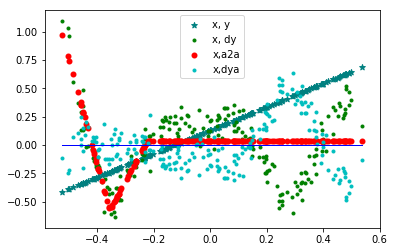

In [44]:
% matplotlib inline
plt.scatter(x, a1.reshape(-1), marker='*', c='teal', lw=1, label='x, y')
plt.scatter(x, dy.reshape(-1), marker='.', c='g', lw=1, label='x, dy')
plt.scatter(x, a2a.reshape(-1), marker='.', c='r', lw=3, label='x,a2a')
plt.scatter(x, dya.reshape(-1), marker='.', c='c', lw=1, label='x,dya')

# colors = ['plum', 'darkviolet', 'purple', 'indigo']
# for i, out in enumerate(a1a.T):
#     plt.scatter(x, out, marker='.', c=colors[i], lw=1)
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.legend()

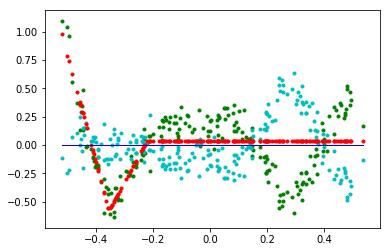

In [49]:
plt.scatter(x, dy.reshape(-1), marker='.', c='g', lw=1, label='x, dy')
plt.scatter(x, dya.reshape(-1), marker='.', c='c', lw=1, label='x,dya')
plt.scatter(x, a2a.reshape(-1), marker='.', c='r', lw=1, label='x,a2a')
plt.plot(x, np.zeros_like(x), c='b', lw=1)

In [50]:
# when residual and original network is combined serially

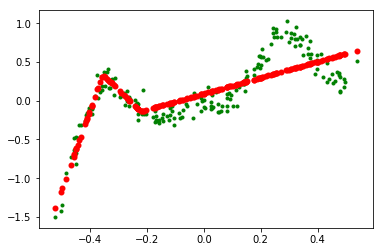

In [51]:
a1l = linear1.forward(x_data)
a1a = layer1a.forward(a1l)
a2a = layer2a.forward(a1a)
yout = a1l - a2a

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=3, label='x,a1l')

## doing more with all non linear networks

In [122]:
hidden_size = 2
optimizer=tnn.Adam(learning_rate=0.03)

layer1a = tnn.NonLinearLayer(1, hidden_size, activation=tnn.Relu(), optimizer=optimizer)
layer2a = tnn.LinearLayer(hidden_size, 1, optimizer=optimizer)
net1 = tnn.AutoForm()
net1.collect_global_layers()

In [123]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

XX = x_data
YY = y_data

for step in range(10000):
    a1 = net1.forward(XX)
    loss = tnn.MseLoss.loss(a1, YY)
    dy = tnn.MseLoss.del_loss(a1, YY)
    
    dx = net1.backward(dy)
    
    net1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', label='x,y')
        plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
        plt.scatter(x, dy.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
        plt.plot(x, np.zeros_like(x), c='b', lw=1)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.15866042967023808


_______________________
epoch 10
Loss 0.08777528551562055


_______________________
epoch 20
Loss 0.0668654507447548


_______________________
epoch 30
Loss 0.05140813130261193


_______________________
epoch 40
Loss 0.0481787672754192


_______________________
epoch 50
Loss 0.0486913050137334


_______________________
epoch 60
Loss 0.047941067474591745


_______________________
epoch 70
Loss 0.04788354023442656


_______________________
epoch 80
Loss 0.04786544172092846


_______________________
epoch 90
Loss 0.0478356213867807


_______________________
epoch 100
Loss 0.047836972351541836


_______________________
epoch 110
Loss 0.04783279128350564


_______________________
epoch 120
Loss 0.04783301138919894


_______________________
epoch 130
Loss 0.04783250459749446


_______________________
epoch 140
Loss 0.04783251510297554


_______________________
epoch 150
Loss 0.047832450661268865


_______________________
epoch 160
Lo

TclError: this isn't a Tk application

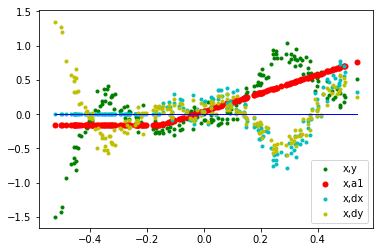

In [124]:
%matplotlib inline

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=3, label='x,a1')
plt.scatter(x, dx.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.scatter(x, dy.reshape(-1), marker='.', c='y', lw=1, label='x,dy')
plt.legend()

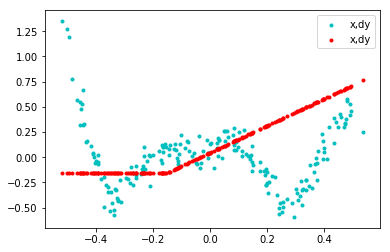

In [125]:
plt.scatter(x, dy.reshape(-1), marker='.', c='c', lw=1, label='x,dy')
plt.scatter(x, a1.reshape(-1), marker='.', c='r', lw=1, label='x,dy')
plt.legend()

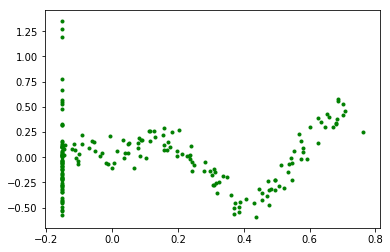

In [126]:
plt.scatter(a1.reshape(-1), dy.reshape(-1), marker='.', c='g', label='a1,dy')

In [127]:
hidden_size = 4
layer1b = tnn.NonLinearLayer(1, hidden_size, activation=tnn.Relu(), optimizer=optimizer)
layer2b = tnn.LinearLayer(hidden_size, 1, optimizer=optimizer)
net2 = tnn.AutoForm()
net2.collect_global_layers()

In [128]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

XX = a1
YY = dy

for step in range(10000):
    a1a = net2.forward(XX)
    loss = tnn.MseLoss.loss(a1a, YY)
    dya = tnn.MseLoss.del_loss(a1a, YY)
    
    dxa = net2.backward(dya)
    
    net2.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, YY.reshape(-1), marker='.', c='g', label='x,dy')
        plt.scatter(x, a1a.reshape(-1), marker='.', c='r', lw=3, label='x,a1a')
        plt.scatter(x, dya.reshape(-1), marker='.', c='c', lw=1, label='x,dxa')
        plt.plot(x, np.zeros_like(x), c='b', lw=1)
#         plt.scatter(x, da1.reshape(-1), marker='.', c='y', lw=1, label='x,da1')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.06009859298285709


_______________________
epoch 10
Loss 0.04728555099509995


_______________________
epoch 20
Loss 0.04509256348555239


_______________________
epoch 30
Loss 0.0435160047806954


_______________________
epoch 40
Loss 0.04156798964192399


_______________________
epoch 50
Loss 0.039237069289395465


_______________________
epoch 60
Loss 0.03661198583159772


_______________________
epoch 70
Loss 0.03416195774981828


_______________________
epoch 80
Loss 0.03227005747625022


_______________________
epoch 90
Loss 0.031073900084207892


_______________________
epoch 100
Loss 0.030496425801905293


_______________________
epoch 110
Loss 0.030317102404653316


_______________________
epoch 120
Loss 0.03027091261887474


_______________________
epoch 130
Loss 0.03025278066814285


_______________________
epoch 140
Loss 0.030246613583431968


_______________________
epoch 150
Loss 0.030246911914574407


_______________________
epoch 



_______________________
epoch 1340
Loss 0.03024711527636772


_______________________
epoch 1350
Loss 0.030253936430374776


_______________________
epoch 1360
Loss 0.03024802239401669


_______________________
epoch 1370
Loss 0.030253431690926435


_______________________
epoch 1380
Loss 0.030246577372377965


_______________________
epoch 1390
Loss 0.030244181695652957


_______________________
epoch 1400
Loss 0.03025971186966216


_______________________
epoch 1410
Loss 0.030253829318756028


_______________________
epoch 1420
Loss 0.03025142385357795


_______________________
epoch 1430
Loss 0.030253625976970164


_______________________
epoch 1440
Loss 0.030245908964022766


TclError: this isn't a Tk application

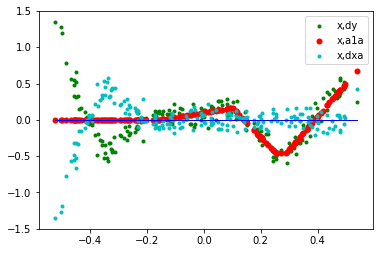

In [129]:
%matplotlib inline

plt.scatter(x, YY.reshape(-1), marker='.', c='g', label='x,dy')
plt.scatter(x, a1a.reshape(-1), marker='.', c='r', lw=3, label='x,a1a')
plt.scatter(x, dya.reshape(-1), marker='.', c='c', lw=1, label='x,dxa')
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.legend()

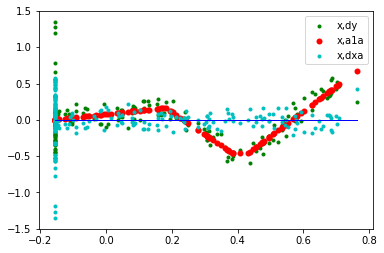

In [130]:
plt.scatter(XX.reshape(-1), YY.reshape(-1), marker='.', c='g', label='x,dy')
plt.scatter(XX.reshape(-1), a1a.reshape(-1), marker='.', c='r', lw=3, label='x,a1a')
plt.scatter(XX.reshape(-1), dya.reshape(-1), marker='.', c='c', lw=1, label='x,dxa')
plt.plot(XX.reshape(-1), np.zeros_like(XX.reshape(-1)), c='b', lw=1)
plt.legend()

In [131]:
## combining them together

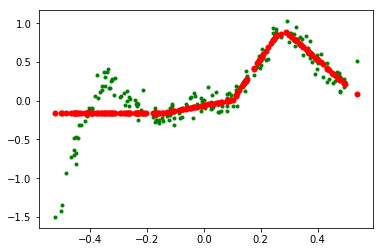

In [132]:
a1 = net1.forward(x_data)
a2 = net2.forward(a1)
yout = a1 - a2

plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, yout.reshape(-1), marker='.', c='r', lw=3, label='x,yout')